# Задание и источники данных

[Задание (Notion)](https://www.notion.so/DVHB-d3be8306f85e40dd842d23056dbf5359)

[Датасет (Kaggle)](https://www.kaggle.com/denisthemartyr/dvhb-hackathon/)

[Классификация кодов культур и групп](https://geoservices.ign.fr/documentation/diffusion/documentation-offre.html)

[Список кодов](https://geoservices.ign.fr/ressources_documentaires/Espace_documentaire/BASES_VECTORIELLES/RPG/Codification_cultures_principales.csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Подготовка данных

**Скачиваем датасет**

In [ ]:
import os
os.chdir("/content")

**Скачиваем на Colab датасет archive.zip (train, test) and raw_archive.zip (2010-2014)**

In [ ]:
!mkdir -p dvhb_data dvhb_data/raw_data && wget -q -O dvhb_data/archive.zip "http://35.156.82.253:8000/archive.zip" && unzip -qq dvhb_data/archive.zip -d dvhb_data && wget -q -O dvhb_data/raw_data.zip "http://35.156.82.253:8000/raw_archive.zip" && unzip -qq dvhb_data/raw_data.zip -d dvhb_data/raw_data && echo "Dataset unpack done!"

Dataset unpack done!


In [ ]:
#!mkdir -p dvhb_data dvhb_data/train && wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ONDEAzm8UmLZ-dldLSCW-rGhxWeVTm49' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ONDEAzm8UmLZ-dldLSCW-rGhxWeVTm49" -O dvhb_data/train/grouped_train_full.csv && rm -rf /tmp/cookies.txt

In [ ]:
grouped_df_train = pd.read_csv("http://35.156.82.253:8000/grouped_train_full.csv")

**Скачиваем на Colab наш датасет с переводом культур и групп (это модифицированный датасет [Классификация кодов культур и групп](https://geoservices.ign.fr/ressources_documentaires/Espace_documentaire/BASES_VECTORIELLES/RPG/Codification_cultures_principales.csv))**

In [ ]:
!wget -q -O dvhb_data/class_cult_translate.csv "http://35.156.82.253:8000/class_cult_translate.csv"

In [ ]:
!pip install tqdm

## **Единое обозначение полей для всех данных:**
---
**CODE_CULT = (код культуры например: "PPH")**

**CODE_GROUP = (код группы культуры например: "18", всего 28)**

**CENTROID = (координаты центра поля например: "Point (907753.82834152 6554634.46488151")**

**YEAR = (год из какого имени файла датасета брались данные, например: "2015")**

**LIBELLE_CULT = (наименование культуры на французском языке, например: "Fourrage")**

**LIBELLE_CULT_RUS = (наименование культуры на русском языке, например: "Фураж")**

**GROUP_CULT = (наименование группы культуры на французском языке, например: "Autres céréales")**

**GROUP_CULT_RUS = (наименование группы культуры на русском языке, например: "Другие злаки")**

**NUM_ILOT = (какой-то уникальный идентификатор, например: "006-603")**

**NOTES = (пометки)**

---


**Функция my_full_cvs сливает вместе файлы *.csv из папки train (2015-2019) в один файл train_full.csv для тренировочной выборки**



In [ ]:
import os
import glob
import re
import pandas as pd
from typing import Tuple, Optional
from tqdm import tqdm

In [ ]:
def my_full_cvs(path, save_filename):
  dataframes = []
  os.chdir(path)
  extension = 'csv'
  all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
  for f in sorted(all_filenames):
    df = pd.read_csv(f, low_memory=False)
    year = re.search(r'\d{4}', f)
    if year:
        df['year'] = year.group(0)
        dataframes.append(df)
  combined = pd.concat(dataframes, ignore_index=True)
  combined.to_csv(save_filename, index=False)
  os.chdir("/content")

In [ ]:
my_full_cvs("dvhb_data/train", "train_full.csv")

In [ ]:
df_train_full_new_names=['CODE_CULT', 'CODE_GROUP', 'CENTROID','YEAR']

In [ ]:
df_train_full = pd.read_csv("dvhb_data/train/train_full.csv", names=df_train_full_new_names,skiprows=1)

In [ ]:
df_train_full.head()

,CODE_CULT,CODE_GROUP,CENTROID,YEAR
0,PPH,18,Point (907753.82834152 6554634.46488151),2015
1,PPH,18,Point (906932.34642625 6550537.14396784),2015
2,PPH,18,Point (906441.41841629 6551578.77930484),2015
3,PPH,18,Point (906510.69053526 6551945.93452219),2015
4,PPH,18,Point (906595.72670333 6550598.70621165),2015


**Делаем единый файл test_full_2019.csv (2015-2018) из папки test/test 2019 для тестовой выборки**

In [ ]:
my_full_cvs("dvhb_data/test/test 2019/", "test_full_2019.csv")

In [ ]:
df_test_full_2019_new_names=['CODE_CULT', 'CODE_GROUP', 'CENTROID','YEAR']

In [ ]:
df_test_full_2019 = pd.read_csv("dvhb_data/test/test 2019/test_full_2019.csv", names=df_test_full_2019_new_names,skiprows=1)

In [ ]:
df_test_full_2019.head(1)

,CODE_CULT,CODE_GROUP,CENTROID,YEAR
0,PPH,18,Point (882657.94895066 6569342.10998129),2015


**Делаем единый файл test_full_2020.csv (2015-2019) из папки test/test 2020 для тестовой выборки**

In [ ]:
my_full_cvs("dvhb_data/test/test 2020/", "test_full_2020.csv")

In [ ]:
df_test_full_2020_new_names=['CODE_CULT', 'CODE_GROUP', 'CENTROID','YEAR']

In [ ]:
df_test_full_2020 = pd.read_csv("dvhb_data/test/test 2020/test_full_2020.csv",names=df_test_full_2020_new_names,skiprows=1)

In [ ]:
df_test_full_2020.head(1)

,CODE_CULT,CODE_GROUP,CENTROID,YEAR
0,FAG,16,Point (645709.52436221 7099158.66801243),2015


**Добавляем в датасет df_train_full столбцы наименование культур и групп, а так же их перевод (всего 4 столбца LIBELLE_CULT, LIBELLE_CULT_RUS, GROUP_CULT, GROUP_CULT_RUS )**

In [ ]:
df_class_cult = pd.read_csv("dvhb_data/class_cult_translate.csv",sep=',')

In [ ]:
df_class_cult = df_class_cult.drop(['CODE_GROUP'], axis=1)

In [ ]:
df_train_full = pd.merge(df_train_full, df_class_cult, left_on='CODE_CULT', right_on='CODE_CULT')

In [ ]:
df_train_full.head(3)

,CODE_CULT,CODE_GROUP,CENTROID,YEAR,LIBELLE_CULT,LIBELLE_CULT_RUS,GROUP_CULT,GROUP_CULT_RUS,NOTES
0,PPH,18,Point (907753.82834152 6554634.46488151),2015,Prairie permanente - herbe prédominante (resso...,Постоянные пастбища - преимущественно трава (д...,Prairies permanentes,Постоянные луга,NaN
1,PPH,18,Point (906932.34642625 6550537.14396784),2015,Prairie permanente - herbe prédominante (resso...,Постоянные пастбища - преимущественно трава (д...,Prairies permanentes,Постоянные луга,NaN
2,PPH,18,Point (906441.41841629 6551578.77930484),2015,Prairie permanente - herbe prédominante (resso...,Постоянные пастбища - преимущественно трава (д...,Prairies permanentes,Постоянные луга,NaN


In [ ]:
test = pd.read_csv("dvhb_data/raw_data/2010.csv")

In [ ]:
df_train_cult_full = pd.read_csv("dvhb_data/raw_data/train_cult_full.csv", names=df_train_cult_full_new_names, skiprows=1)

In [ ]:
test

,CULT_MAJ,NUM_ILOT,centroid
0,23,006-600,POINT (1036321.777965606 6313793.803955953)
1,23,006-601,POINT (1062367.545310645 6321180.197514395)
2,23,006-602,POINT (1062424.026822849 6321197.461531096)
3,23,006-603,POINT (1052736.825328681 6313753.632340802)
4,23,006-604,POINT (1052659.154533222 6313747.855598602)
...,...,...,...
6123254,5,086-93794,POINT (519070.2904554354 6607941.158185185)
6123255,13,086-93795,POINT (521486.2052879647 6607842.57304298)
6123256,1,086-93796,POINT (524495.4002941921 6603589.442552738)
6123257,5,086-93797,POINT (520665.7147127037 6608823.842154902)


In [ ]:
my_full_cvs("dvhb_data/raw_data", "train_cult_full.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: DtypeWarning: Columns (0,1,2,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [ ]:
df_train_cult_full_new_names=['CODE_GROUP', 'CENTROID','YEAR']

In [ ]:
df_train_cult_full = pd.read_csv("dvhb_data/raw_data/train_cult_full.csv")

In [ ]:
df_train_cult_full.head()

# Светлана

In [ ]:
import gensim
from gensim import corpora
from pprint import pprint

# делаю маленький датасет

size = 18074
com1 = df_train_full.sample(size).copy()

# удаляю лишнее из координат
def stri(ee):
  result  = re.sub(r'[^0-9. ]+','', ee) # заменяю 
  return result

com1['centroid_n'] = com1['CENTROID'].apply(stri)

# кодирую слова векторами
text = [com1['CODE_CULT'].tolist()]
dictionary = corpora.Dictionary(text)

#заменяем значения в столбце object_name_n на данные из словаря, а ключи берем из столбца object_type_number
com1['CODE_CULTU_COD'] = com1['CODE_CULT'].map(dictionary.token2id)

# режем по пробелу
street = com1['centroid_n'].str.split(' ',expand=True)
com1 = com1.join(street)

com1 = com1[['CODE_CULTU_COD','CODE_GROUP','YEAR',1,2]]

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
import seaborn as sns
y = com1['CODE_CULTU_COD']
X = com1.drop(['CODE_CULTU_COD'], axis=1)

# долго считает дендрограмму
#linked = linkage(X, method = 'ward') 
#plt.figure(figsize=(15, 10))  
#dendrogram(linked, orientation='top')
#plt.show() 

In [ ]:
# думала или на 22 кластера или на  6 -надо посмтреть качество разбиения
n_clusters = 22
km = KMeans(n_clusters = n_clusters) # задаём число кластеров, равное 22
labels1 = km.fit_predict(X[[1,2]]) # применяем алгоритм к данным и формируем вектор кластеров 

n_clusters = 6
km = KMeans(n_clusters = n_clusters) # задаём число кластеров, равное 6
labels2 = km.fit_predict(X[[1,2]])

com1['cluster_km1'] = labels1
com1['cluster_km2'] = labels2

com1.head(5)

,CODE_CULTU_COD,CODE_GROUP,YEAR,1,2,cluster_km1,cluster_km2
5189742,110,18,2019,627542.77452513,6519771.28023007,16,1
7517222,12,1,2017,1007138.26384073,6865216.09067153,5,0
4230865,110,18,2018,705051.28071358,6539174.20386762,16,2
9144416,119,19,2017,570937.33240652,6487924.39134572,2,1
14468205,149,6,2017,636994.25672198,6241771.05391248,13,4


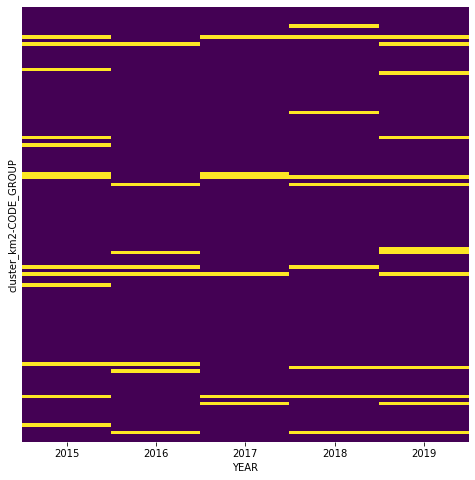

In [ ]:
# возьмем данные для более общих областей
data = com1.pivot_table(index = ['cluster_km2','CODE_GROUP'], columns = ['YEAR'], values = 'CODE_CULTU_COD', aggfunc = 'mean')

fig, ax = plt.subplots(figsize=(8,8))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

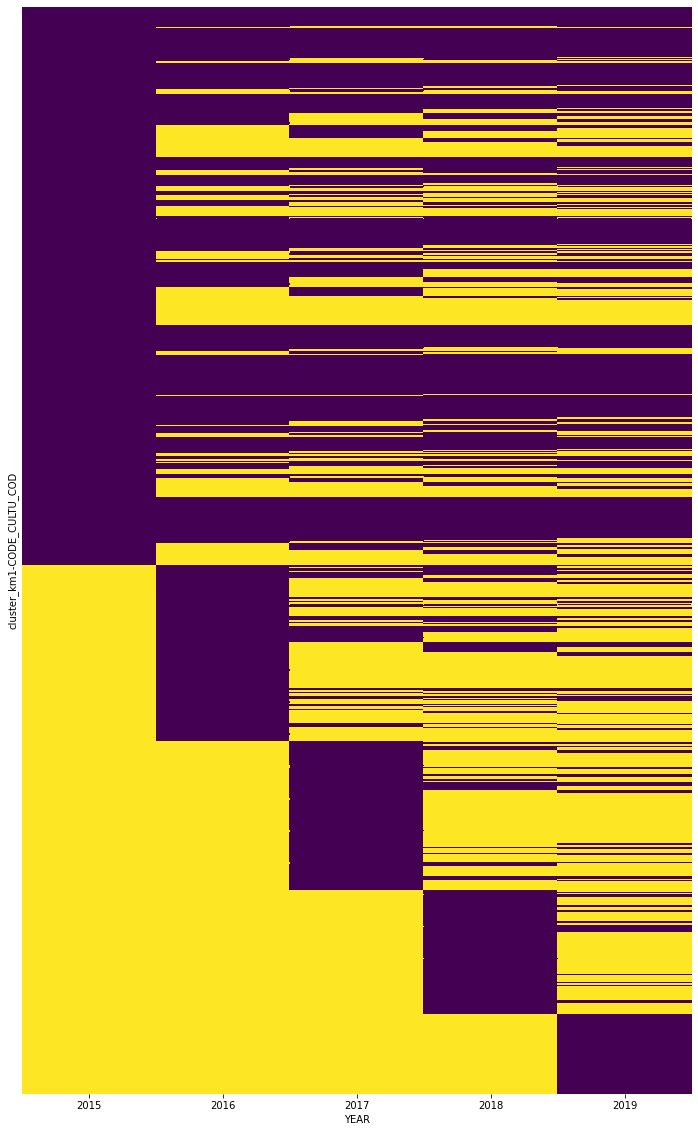

In [ ]:
# возьмем данные для  мелких областей
data = com1.pivot_table(index = ['cluster_km1','CODE_CULTU_COD'], columns = ['YEAR'], values = 'CODE_GROUP', aggfunc = 'mean').\
        sort_values(by = [2015,2016,2017,2018,2019])

fig, ax = plt.subplots(figsize=(12,20))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#Павел

In [ ]:
df_train_full[df_train_full['CENTROID'] == 'Point (1000001.31785654 6472025.93934252)']

,CODE_CULT,CODE_GROUP,CENTROID,YEAR,LIBELLE_CULT,LIBELLE_CULT_RUS,GROUP_CULT,GROUP_CULT_RUS,NOTES
9304783,PTR,19,Point (1000001.31785654 6472025.93934252),2018,Autre prairie temporaire de 5 ans ou moins,Прочие временные пастбища 5 лет или меньше,Prairies temporaires,Постоянные луга,NaN
9514094,PTR,19,Point (1000001.31785654 6472025.93934252),2019,Autre prairie temporaire de 5 ans ou moins,Прочие временные пастбища 5 лет или меньше,Prairies temporaires,Постоянные луга,NaN
15543944,MH5,16,Point (1000001.31785654 6472025.93934252),2015,Mélange de légumineuses fourragères prépondéra...,Смесь преимущественно кормовых зернобобовых ку...,Fourrage,Фураж,NaN
15551069,MH5,16,Point (1000001.31785654 6472025.93934252),2016,Mélange de légumineuses fourragères prépondéra...,Смесь преимущественно кормовых зернобобовых ку...,Fourrage,Фураж,NaN
17938699,MH6,16,Point (1000001.31785654 6472025.93934252),2017,Mélange de légumineuses fourragères prépondéra...,Смесь преимущественно кормовых зернобобовых ку...,Fourrage,Фураж,NaN


In [ ]:
def get_coords(coords: str) -> Tuple[Optional[float], Optional[float]]:
    '''
    Разбирает строковое представление координат

    :param coords: сроковое представление координат
    :return tuple кортеж из полученных координат
    '''
    regex = re.search('(?P<lang>\d+\.?\d*)\s(?P<long>\d+\.?\d*)', coords)
    return regex.group('lang'), regex.group('long')

In [ ]:
df_train_grouped_full = df_train_full.groupby('CENTROID', dropna=False).agg(list)

In [ ]:
df_train_grouped_full.head()

,CODE_CULTU,CODE_GROUP,year,GROUPE_CULTURE,LIBELLE_CULTURE
centroid,,,,,
Point (1000000.08652894 6510087.46241743),"[PPH, PPH, PPH, PPH, PPH]","[18, 18, 18, 18, 18]","[2015, 2016, 2017, 2018, 2019]",[Prairie permanente - herbe prédominante (ress...,"[Prairies permanentes, Prairies permanentes, P..."
Point (1000000.63976388 6471730.5886227),"[PPH, PPH, PPH, PPH, PPH]","[18, 18, 18, 18, 18]","[2015, 2016, 2017, 2018, 2019]",[Prairie permanente - herbe prédominante (ress...,"[Prairies permanentes, Prairies permanentes, P..."
Point (1000000.99403502 6373722.56080617),"[PPH, PPH, PPH, PPH, SPL]","[18, 18, 18, 18, 17]","[2016, 2017, 2018, 2019, 2015]",[Prairie permanente - herbe prédominante (ress...,"[Prairies permanentes, Prairies permanentes, P..."
Point (1000001.31785654 6472025.93934252),"[PTR, PTR, MH5, MH5, MH6]","[19, 19, 16, 16, 16]","[2018, 2019, 2015, 2016, 2017]","[Autre prairie temporaire de 5 ans ou moins, A...","[Prairies temporaires, Prairies temporaires, F..."
Point (1000002.51285272 6894831.40789418),"[PPH, PPH, PPH, PPH, PPH]","[18, 18, 18, 18, 18]","[2015, 2016, 2017, 2018, 2019]",[Prairie permanente - herbe prédominante (ress...,"[Prairies permanentes, Prairies permanentes, P..."


ппц сколько считаеться - у меня 1 % посчитался за 2 минуты

In [ ]:
df_train_grouped_full

In [ ]:
columns = [f'{column}_{year}' for column in df_train_full.columns.drop(['CENTROID', 'YEAR']) for year in df_train_full['YEAR'].unique()] + ['LATITUDE', 'LONGTITUDE']
new_df_train = pd.DataFrame(columns=columns)
new_df_train.to_csv("grouped_train_full.csv", index=False)

for row in tqdm(df_train_grouped_full.iterrows(), total=len(df_train_grouped_full)):
    if len(new_df_train) == 1000:
        new_df_train.to_csv("grouped_train_full.csv", mode='a', header=False, index=False, columns=columns)
        del new_df_train
        new_df_train = pd.DataFrame(columns=columns)
    regex = re.search('(?P<lat>\d+\.?\d*)\s(?P<long>\d+\.?\d*)', row[0])
    new_df_train = new_df_train.append({**{f'{column}_{year}': row[1][column][i] for column in row[1].keys().drop('YEAR') for i, year in enumerate(row[1]['YEAR'])}, **{'LATITUDE': regex.group('lat'), 'LONGTITUDE': regex.group('long')}}, ignore_index=True)
    

new_df_train.head()

In [ ]:
grouped_df_train = pd.read_csv("dvhb_data/train/grouped_train_full.csv")

In [ ]:
grouped_df_train

,CODE_CULTU_2015,CODE_CULTU_2016,CODE_CULTU_2017,CODE_CULTU_2018,CODE_CULTU_2019,CODE_GROUP_2015,CODE_GROUP_2016,CODE_GROUP_2017,CODE_GROUP_2018,CODE_GROUP_2019,GROUPE_CULTURE_2015,GROUPE_CULTURE_2016,GROUPE_CULTURE_2017,GROUPE_CULTURE_2018,GROUPE_CULTURE_2019,LIBELLE_CULTURE_2015,LIBELLE_CULTURE_2016,LIBELLE_CULTURE_2017,LIBELLE_CULTURE_2018,LIBELLE_CULTURE_2019,LATITUDE,LONGTITUDE
0,PPH,PPH,PPH,PPH,PPH,18,18,18,18,18,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairies permanentes,Prairies permanentes,Prairies permanentes,Prairies permanentes,Prairies permanentes,1.000000e+06,6.510087e+06
1,PPH,PPH,PPH,PPH,PPH,18,18,18,18,18,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairies permanentes,Prairies permanentes,Prairies permanentes,Prairies permanentes,Prairies permanentes,1.000001e+06,6.471731e+06
2,SPL,PPH,PPH,PPH,PPH,17,18,18,18,18,Surface pastorale - ressources fourragères lig...,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Estives et landes,Prairies permanentes,Prairies permanentes,Prairies permanentes,Prairies permanentes,1.000001e+06,6.373723e+06
3,MH5,MH5,MH6,PTR,PTR,16,16,16,19,19,Mélange de légumineuses fourragères prépondéra...,Mélange de légumineuses fourragères prépondéra...,Mélange de légumineuses fourragères prépondéra...,Autre prairie temporaire de 5 ans ou moins,Autre prairie temporaire de 5 ans ou moins,Fourrage,Fourrage,Fourrage,Prairies temporaires,Prairies temporaires,1.000001e+06,6.472026e+06
4,PPH,PPH,PPH,PPH,PPH,18,18,18,18,18,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairies permanentes,Prairies permanentes,Prairies permanentes,Prairies permanentes,Prairies permanentes,1.000003e+06,6.894831e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613995,PRL,PRL,PRL,PPH,PPH,18,18,18,18,18,Prairie en rotation longue (6 ans ou plus),Prairie en rotation longue (6 ans ou plus),Prairie en rotation longue (6 ans ou plus),Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairies permanentes,Prairies permanentes,Prairies permanentes,Prairies permanentes,Prairies permanentes,9.995372e+05,6.471052e+06
3613996,PPH,PPH,PPH,PPH,PPH,18,18,18,18,18,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairie permanente - herbe prédominante (resso...,Prairies permanentes,Prairies permanentes,Prairies permanentes,Prairies permanentes,Prairies permanentes,9.995386e+05,6.788438e+06
3613997,TTH,MH6,PTR,PTR,MLG,4,16,19,19,16,Triticale dhiver,Mélange de légumineuses fourragères prépondéra...,Autre prairie temporaire de 5 ans ou moins,Autre prairie temporaire de 5 ans ou moins,Mélange de légumineuses prépondérantes au semi...,Autres céréales,Fourrage,Prairies temporaires,Prairies temporaires,Fourrage,9.995392e+05,6.893094e+06
3613998,CZH,BTH,MIE,BTH,ORH,5,1,2,1,3,Colza dhiver,Blé tendre dhiver,Maïs ensilage,Blé tendre dhiver,Orge d'hiver,Colza,Blé tendre,Maïs grain et ensilage,Blé tendre,Orge,9.995394e+05,6.714507e+06


In [ ]:
com1 = grouped_df_train.sample(361400).copy()
pd.save_csv("com1.csv")

In [ ]:
grouped_df_train.isnull().sum()

CODE_CULTU_2015         0
CODE_CULTU_2016         0
CODE_CULTU_2017         0
CODE_CULTU_2018         0
CODE_CULTU_2019         0
CODE_GROUP_2015         0
CODE_GROUP_2016         0
CODE_GROUP_2017         0
CODE_GROUP_2018         0
CODE_GROUP_2019         0
GROUPE_CULTURE_2015     0
GROUPE_CULTURE_2016     0
GROUPE_CULTURE_2017     0
GROUPE_CULTURE_2018     0
GROUPE_CULTURE_2019     0
LIBELLE_CULTURE_2015    0
LIBELLE_CULTURE_2016    0
LIBELLE_CULTURE_2017    0
LIBELLE_CULTURE_2018    0
LIBELLE_CULTURE_2019    0
LATITUDE                0
LONGTITUDE              0
dtype: int64

In [ ]:
grouped_df_train.sample(n = int(len(grouped_df_train)/10)).to_csv('sample_10.csv')

NameError: ignored

In [ ]:
grouped_df_train = pd.read_csv("http://35.156.82.253:8000/grouped_train_full.csv")

In [ ]:
grouped_df_train.head(1)

,Unnamed: 0,CODE_CULT_2015,CODE_CULT_2016,CODE_CULT_2017,CODE_CULT_2018,CODE_CULT_2019,CODE_GROUP_2015,CODE_GROUP_2016,CODE_GROUP_2017,CODE_GROUP_2018,CODE_GROUP_2019,LATITUDE,LONGTITUDE
0,Point (1000000.08652894 6510087.46241743),PPH,PPH,PPH,PPH,PPH,18,18,18,18,18,1.000000e+06,6.510087e+06


In [ ]:
import gensim
from gensim import corpora
from pprint import pprint
from sklearn.model_selection import train_test_split
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
from catboost.utils import eval_metric
# Пашин датасет, оставлю только растения и место
df_test_swetlana = grouped_df_train[['CODE_CULT_2015','CODE_CULT_2016','CODE_CULT_2017','CODE_CULT_2018','CODE_CULT_2019','LATITUDE','LONGTITUDE']].copy()

# кодирую слова векторами
text = [df_train_full['CODE_CULT'].tolist()]
dictionary = corpora.Dictionary(text)

#заменяем значения в столбце object_name_n на данные из словаря, а ключи берем из столбца object_type_number
df_test_swetlana['CODE_CULT_2019'] = df_test_swetlana['CODE_CULT_2019'].map(dictionary.token2id)
df_test_swetlana['CODE_CULT_2018'] = df_test_swetlana['CODE_CULT_2018'].map(dictionary.token2id)
df_test_swetlana['CODE_CULT_2017'] = df_test_swetlana['CODE_CULT_2017'].map(dictionary.token2id)
df_test_swetlana['CODE_CULT_2016'] = df_test_swetlana['CODE_CULT_2016'].map(dictionary.token2id)
df_test_swetlana['CODE_CULT_2015'] = df_test_swetlana['CODE_CULT_2015'].map(dictionary.token2id)

# делим
X = df_test_swetlana.drop(['CODE_CULT_2019', ], axis=1)
y = df_test_swetlana['CODE_CULT_2019']

features_train, features_valid, target_train, target_valid = train_test_split(
    X, y, test_size=0.25, random_state=12345)


model = CatBoostClassifier(verbose=100,
                           learning_rate=0.7,
                           early_stopping_rounds=200,
                           eval_metric='AUC',
                           #task_type="GPU",
                           )

model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid) 

print(accuracy_score(target_valid, predictions_valid))
